In [56]:
%matplotlib inline

import os 
import librosa
import numpy as np
import string as strp
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm, neighbors

import importlib
import pr_util as util

In [72]:
importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [63]:
#data_dir = '/Users/felipefelix/USP/tcc/dataset/exp/'
#data_dir = '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/'
#data_dir = '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/'
#data_dir = '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/'

def generate_local_feature(file_dir, feat_name, feat_func, y, **kwargs):
    output_file = file_dir + '.' + feat_name + '.txt'
    if not os.path.isfile(output_file):
        print('generating {} for {}...'.format(feat_name, file_dir))
        feature = feat_func(y = y, **kwargs)
        np.savetxt(output_file, feature)
    else:
        print('{} already exists.'.format(output_file))

for data_dir in util.DATA_DIR_FULL:
    for subdir, dirs, files in os.walk(data_dir):
        for file in files:
            if util.is_audio(file):
    #            print('{} {} {}'.format(file, dirs, subdir))
                file_dir = subdir + '/' + file
                print('Loading {}...'.format(file_dir))        
                y, sr = librosa.load(file_dir)

                #generate_local_feature(file_dir, 'rmse', librosa.feature.rmse, y)

                #generate_local_feature(file_dir, 'stft', librosa.core.stft, y)

                #generate_local_feature(file_dir, 'mfcc', librosa.feature.mfcc, y)



Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/call/100015.mp3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/call/100021.mp3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/call/AEGOLI~1.MP3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/call/AEGOLI~2.MP3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/song/10001.mp3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/song/100010.mp3...
Loading /Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/song/100011.mp3...


KeyboardInterrupt: 

In [78]:
def generate_global_features(n_global_feat, feat_name, data_dirs, song_or_call, functions):
    # n_global_feat: number of global features
    # feat_name: feature name, must use the convection file.feat_name.txt
    # data_dirs: list with directories with birds features
    # song_or_call: what type of recording is to be used
    # functions: list with functions that will generate global features (np.max, etc...)
    
    labels_dict = {}
    
    labels  = []
    n_label = -1
    n_files = util.num_files(data_dirs, song_or_call)
    i = 0
    j = 0
    data = np.empty((n_files, n_global_feat))

    for data_dir in data_dirs:
        for subdir, dirs, files in os.walk(data_dir):
            for file in files:
                type_of_rec = subdir.split('/')[-1] # Is it a call or a song?
                if type_of_rec == song_or_call and file.split('.')[-2] == feat_name:
                    bird_specie = subdir.split('/')[-2].title()
                    if not bird_specie in labels_dict.keys():
                        n_label += 1
                        labels_dict[bird_specie] = n_label
                        labels.append(n_label)
                    else:
                        labels.append(labels_dict[bird_specie])
                    feature_path = subdir + '/' + file
                    feature = np.loadtxt(feature_path)
                    
                    for function in functions: # Iterate through all functions
                        data[i][j] = function(feature)
                        j += 1
                    i += 1    
                    j  = 0
    return labels_dict, labels, data
                    
                

#data_dir = '/Users/felipefelix/USP/tcc/dataset/exp/'
data_dir = '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/'

# 2 species = 34 files
# 3 species = 47 files

n_files = 47
#n_species = 3
n_global_features = 4
feat_name = 'mfcc'

data = np.empty((n_files, n_global_features))
labels = []
labels_dict = {}
i = 0
n_label = -1

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        #print(file)
        call_or_song = subdir.split('/')[-1]
        if call_or_song == 'song' and file.split('.')[-2] == feat_name:
            bird_specie = subdir.split('/')[-2].title()
            if not bird_specie in labels_dict.keys():
                n_label += 1
                labels_dict[bird_specie] = n_label
                labels.append(n_label)
            else:
                labels.append(labels_dict[bird_specie])
            #labels.append(bird_specie) # If we don't want to use labels_dict.
            feature_path = subdir + '/' + file
            feature = np.loadtxt(feature_path)
            data[i][0] = np.mean(feature)
            data[i][1] = np.std(feature)
            data[i][2] = np.max(feature)
            data[i][3] = np.min(feature)
            i += 1
        if i == n_files:
            break

#print(data)
print(labels_dict)
labels = np.array(labels)
print(labels)
print(data)

{'Anthus Lutescens': 2, 'Amazilia Versicolor': 1, 'Aegolius Harrisii': 0}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2]
[[ -1.23178598e+01   1.21936375e+02   1.01248500e+02  -5.62127073e+02]
 [ -8.53646188e+00   4.26598302e+01   8.00025802e+01  -6.08064617e+02]
 [ -1.36213501e+01   6.99577457e+01   9.34379455e+01  -6.91419455e+02]
 [ -5.36123017e+00   6.24464563e+01   9.69469734e+01  -6.61072356e+02]
 [ -7.57441960e+00   6.73552541e+01   1.61743219e+02  -5.81108924e+02]
 [ -3.86611208e+00   5.30433812e+01   1.00794800e+02  -5.56531942e+02]
 [ -5.73415271e+00   4.21875754e+01   8.52341250e+01  -6.23647020e+02]
 [ -1.05974084e+01   4.62444001e+01   1.06082534e+02  -5.62208704e+02]
 [ -2.47689393e+01   1.28233973e+02   9.14695222e+01  -6.11730721e+02]
 [ -2.08160485e+01   6.64309454e+01   1.38103448e+02  -5.57223783e+02]
 [ -1.41999255e+01   8.59808166e+01   1.51859038e+02  -6.52378609e+02]
 [ -9.39341247e+00   4.13998553e+01   6.98711695

In [79]:
data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Aegolius harrisii/',
            '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Amazilia Versicolor/',
            '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Anthus Lutescens/']
functions = [np.mean, np.std, np.max, np.min]
n_global_feat = 4
feat_name = 'mfcc'
song_or_call = 'song'
print(generate_global_features(n_global_feat, feat_name, data_dirs, song_or_call, functions))

({'Anthus Lutescens': 2, 'Amazilia Versicolor': 1, 'Aegolius Harrisii': 0}, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], array([[ -1.23178598e+01,   1.21936375e+02,   1.01248500e+02,
         -5.62127073e+02],
       [ -8.53646188e+00,   4.26598302e+01,   8.00025802e+01,
         -6.08064617e+02],
       [ -1.36213501e+01,   6.99577457e+01,   9.34379455e+01,
         -6.91419455e+02],
       [ -5.36123017e+00,   6.24464563e+01,   9.69469734e+01,
         -6.61072356e+02],
       [ -7.57441960e+00,   6.73552541e+01,   1.61743219e+02,
         -5.81108924e+02],
       [ -3.86611208e+00,   5.30433812e+01,   1.00794800e+02,
         -5.56531942e+02],
       [ -5.73415271e+00,   4.21875754e+01,   8.52341250e+01,
         -6.23647020e+02],
       [ -1.05974084e+01,   4.62444001e+01,   1.06082534e+02,
         -5.62208704e+02],
       [ -2.47689393e+01,   1.28233973e+02,   9.14695222e+01,
       

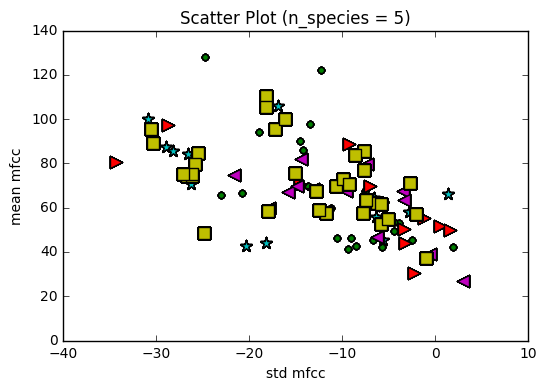

In [41]:
h = .02  # step size in the mesh

X = data[:,:2]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


x = X[:,0]
y = X[:,1]
fig, ax = plt.subplots()
markers = ['.', '.', '>', '*', '<', ',', '1', '8']    
colors = ['b','g','r','c','m','y','k','w']

for label in labels:
    ax.scatter(x[labels == label], y[labels == label], marker = markers[label], c = colors[label], s = 75)

plt.title("Scatter Plot (n_species = %i)" % (max(labels)))
ax.set_xlabel('std mfcc')
ax.set_ylabel('mean mfcc')
plt.show()


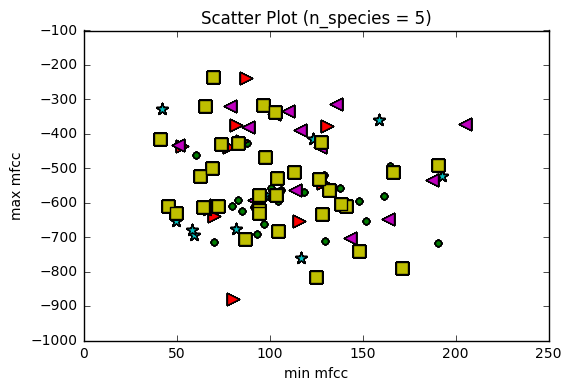

In [42]:
h = .02  # step size in the mesh
X = data[:,2:]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


x = X[:,0]
y = X[:,1]
fig, ax = plt.subplots()
markers = ['.', '.', '>', '*', '<', ',', '1', '8']    
colors = ['b','g','r','c','m','y','k','w']

for label in labels:
    ax.scatter(x[labels == label], y[labels == label], marker = markers [label], c = colors[label], s = 75)

plt.title("Scatter Plot (n_species = %i)" % (max(labels)))
ax.set_xlabel('min mfcc')
ax.set_ylabel('max mfcc')
plt.show()


In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=0)

In [44]:
for k in range(3,20):
    for weight in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(k, weights=weight)
        clf.fit(X_train, y_train)
        f_measure = clf.score(X_test, y_test)
        print("{}-Neighbors | F-Measure: {} | Weight: {}".format(k, f_measure, weight))

3-Neighbors | F-Measure: 0.21052631578947367 | Weight: uniform
3-Neighbors | F-Measure: 0.2631578947368421 | Weight: distance
4-Neighbors | F-Measure: 0.42105263157894735 | Weight: uniform
4-Neighbors | F-Measure: 0.2631578947368421 | Weight: distance
5-Neighbors | F-Measure: 0.42105263157894735 | Weight: uniform
5-Neighbors | F-Measure: 0.3157894736842105 | Weight: distance
6-Neighbors | F-Measure: 0.42105263157894735 | Weight: uniform
6-Neighbors | F-Measure: 0.3157894736842105 | Weight: distance
7-Neighbors | F-Measure: 0.5789473684210527 | Weight: uniform
7-Neighbors | F-Measure: 0.3157894736842105 | Weight: distance
8-Neighbors | F-Measure: 0.5263157894736842 | Weight: uniform
8-Neighbors | F-Measure: 0.3157894736842105 | Weight: distance
9-Neighbors | F-Measure: 0.5263157894736842 | Weight: uniform
9-Neighbors | F-Measure: 0.2631578947368421 | Weight: distance
10-Neighbors | F-Measure: 0.5263157894736842 | Weight: uniform
10-Neighbors | F-Measure: 0.2631578947368421 | Weight: dis

In [45]:
print("---------------------- Treinamento -------------------------")
print(X_train)
print(y_train)
print("------------------------ Teste ----------------------")
print(X_test)
print(y_test)

---------------------- Treinamento -------------------------
[[ -2.03517098e+01   4.27675330e+01   4.24020248e+01  -3.28824586e+02]
 [ -6.95214725e+00   6.98549810e+01   7.84088011e+01  -4.37039503e+02]
 [ -5.64100966e+00   4.54953673e+01   9.76716814e+01  -5.78641307e+02]
 [  5.10464785e-01   5.18367832e+01   1.30980422e+02  -3.78145266e+02]
 [ -5.73415271e+00   4.21875754e+01   8.52341250e+01  -6.23647020e+02]
 [ -1.68978002e+01   1.06127992e+02   1.16654635e+02  -7.61551860e+02]
 [ -6.71887004e+00   6.14040743e+01   7.84992535e+01  -3.18272165e+02]
 [ -2.67136926e+01   7.45034016e+01   9.45121274e+01  -6.29887761e+02]
 [ -5.83871204e+00   5.25175987e+01   1.03850987e+02  -5.29160780e+02]
 [ -1.25009369e+01   5.88658013e+01   1.48111844e+02  -7.38901219e+02]
 [ -1.50379126e+01   7.57818086e+01   1.90710368e+02  -4.91429583e+02]
 [ -7.60787822e+00   7.68013666e+01   1.04238899e+02  -6.81772411e+02]
 [ -5.36123017e+00   6.24464563e+01   9.69469734e+01  -6.61072356e+02]
 [ -2.55244191e+

In [46]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
#clf.predict(X_test)
clf.score(X_test, y_test) # Retorna f-measure

0.57894736842105265